### **Scenario**

Sailfort Motors are currently having a high rate of turnover. Since Sailfort Motors invest in recruiting, training, and upskilling their employees, the impact of high turnover rate is costly in the financial sense. The HR department were tasked by the leadership team of Sailfort Motors to collect sample data from the employees on what might be the cause of high turnovers. The leadership also tasked you to analyze the survey data and design a model to predict employee departure.

_Note: Turnover data includes both employees who choose to quit their job and employees who are let go._

The task also involves identifying the factors that contribute to employee departure. The model will be beneficial to the company by increasing retention rate and job satisfaction of employees.

- **Issue/Problem**
  - Sailfort Motors seeks to improve employee retention.
- **Response**
  - Since the variable to be predicted is **_categorical_**, a logistic regression or tree-based machine learning model will be used.
- **Impact**
  - The model will help predict employee departure and the factors that causes it. The HR can also devise a plan to prevent departures and improve employee retention.

### **Familiarization of the HR Dataset**

The dataset was provided by Google Certificates, but can also be downloaded in [Kaggle](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv). The dataset contains 14,999 rows and 10 columns. Shown below are the variables used in the dataset and its corresponding description.
Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

### **Import the necessary packages**

In [832]:
## For data manipulation
import numpy as np
import pandas as pd

## For data visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

## For displaying all columns in the dataframe
pd.set_option('display.max_columns',None)

## For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

# Miscellaneous
import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

### **Load Dataset**

In [833]:
df0 = pd.read_csv("D:\Documents\Google Advanced Data Analytics Professional Certificate\Sailfort Motors Capstone\HR_comma_sep.csv")

In [834]:
## Display the first 10 rows of data
df0.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


### **Data Exploration**

#### **Basic Information about the Data**

In [835]:
## Basic information about the data
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


Based on the basic information about the data, there are **`14,999`** non-null objects for all columns, equal to the total number of rows, which means that there are **no null** values in the dataset. The corresponding datatype for each columns are also shown.

#### **Descriptive Statistics about the Data**

In [836]:
df0.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### **Rename Columns**
Standardize column names into `snake_case` ,rename misspelled column names, and simplify column names.
The following columns will be renamed:
- average_montly_hours
- Work_accident
- time_spend_company
- Department

In [837]:
## Rename columns
df0 = df0.rename(columns={'average_montly_hours': 'average_monthly_hours',
                          'Work_accident': 'work_accident',
                          'time_spend_company': 'tenure',
                          'Department': 'department'})

## Check if columns are renamed
df0

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


By checking, the column names are standardized, concise, and free from misspelled words.

#### **Check Duplicate Data**

In [838]:
## Check data for duplicates
print(df0.duplicated().sum())

3008


In [839]:
## Inspect rows containing duplicates
df0[df0.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The dataset contains 3008 duplicated entries. Upon inspecting the rows containing duplicates, it is unlikely that two employees reporting the same responses for every columns. However, dropping these duplicates could cause imbalance to the dataset, so we'll check the number of duplicated entries for each values of the target variable `left`.

In [840]:
## Create a dataset containing duplicated data
df_duplicates = df0[df0.duplicated()==True]

##Check the number of duplicated values for each value of the target variable
print(df_duplicates['left'].value_counts())

left
1    1580
0    1428
Name: count, dtype: int64


Both of the values for the target variable `left` have duplicated entries. However, the legitimacy of duplicated entries is questionable and might affect results of the analysis, therefore we will proceed by dropping them.

In [841]:
#Drop duplicated rows and save it to a new dataframe
df1 = df0.drop_duplicates(keep = 'first')

df1.head()


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [842]:
print(df1.shape)

(11991, 10)


The dataset is left with **11,991** rows.

#### **Check Dataset for Outliers**

The `tenure` column have a max value of more than 2.5x standard deviation. Using a boxplot, we will confirm the outliers.

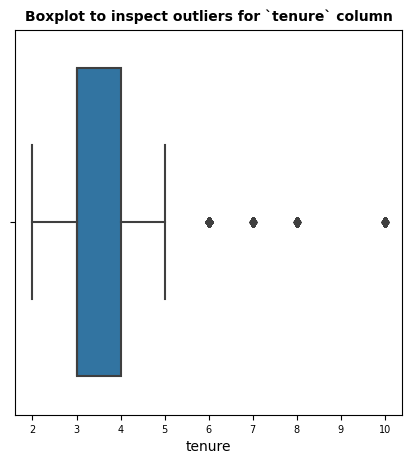

In [843]:
plt.figure(figsize=(5,5))
plt.title('Boxplot to inspect outliers for `tenure` column',fontweight='bold',fontsize=10)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
sns.boxplot(x=df1['tenure'])
plt.show()

The boxplot confirms the presence of outliers in the `tenure` column. We will now investigate the number of rows that contain outliers in the `tenure` column.

In [844]:
# 25th percentile value for the 'tenure' column
percentile25 = df1['tenure'].quantile(0.25)

# 75th percentile value for the 'tenure' column
percentile75 = df1['tenure'].quantile(0.75)

# Interquartile range in 'tenure' column
iqr = percentile75 - percentile25

# Upper and lower limit for non-outlier values in 'tenure' column
upper_limit = percentile75 + (1.5*iqr)
print('Upper Limit:',upper_limit)
lower_limit = percentile25 - (1.5*iqr)
print('Lower Limit:',lower_limit)

# Subset of data containing outliers in 'tenure' column
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]
print('Number of rows containing outliers in `tenure` column:', len(outliers))


Upper Limit: 5.5
Lower Limit: 1.5
Number of rows containing outliers in `tenure` column: 824


There are **824** rows containing outliers in the `tenure` column. However, since we will be using tree-based model, which is less sensitive to outliers, we will not remove the outliers.

##### **Determine the percentage of employees left to the total number of employees.**

In [845]:
print(df1['left'].value_counts())
print()

print(df1['left'].value_counts(normalize=True))

left
0    10000
1     1991
Name: count, dtype: int64

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64


Based on the HR dataset that is free from duplicates, the percentage of employees left to the total number of employees is **16.60%**.

### **Data Visualization**

After data exploration, we will create different plots to investigate the relationship between variables in the HR dataset.

**a. Relationship between `average_monthly_hours` and `number_project`**

- For this relationship, we will use a box plots and stacked histogram. The boxplot is useful to visualizing the distribution of data, however it does not accurately display the distribution of the data. For the distribution of data, we will use a stacked histogram.

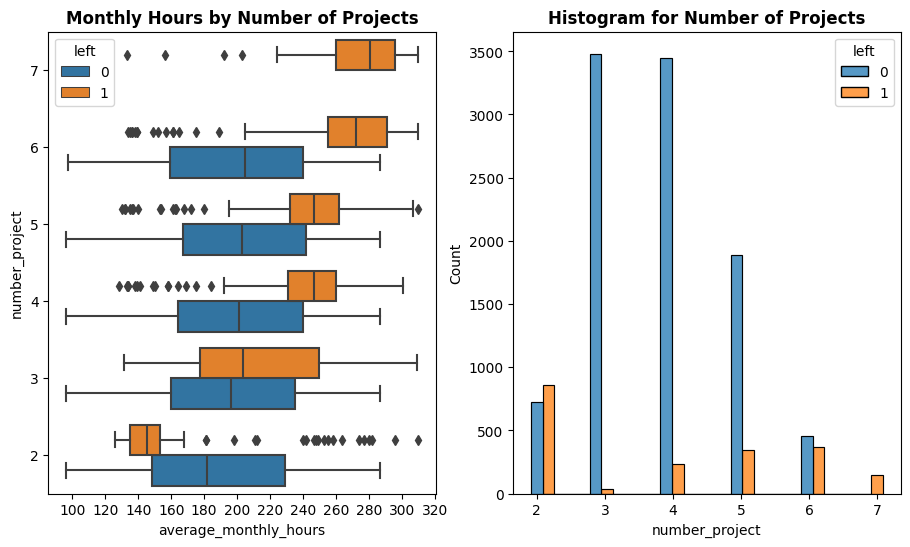

In [846]:
fig, ax = plt.subplots(1,2, figsize=(11,6))

## Create boxplot
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient='h', ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title("Monthly Hours by Number of Projects", fontweight='bold')
ax[0].set_xticks([100,120,140,160,180,200,220,240,260,280,300,320])

## Create histogram
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title("Histogram for Number of Projects", fontweight='bold')

plt.show()

The plot shows that the mean number of hours worked for employees who left and stayed increases as the number of project increases. This is expected, as those who worked with more projects tend to work longer hours. However, several things seems to be noticeable in the plots:


1. There is a noticeable difference in the mean work hours for employees who left versus employees who stayed. The mean number of work hours for employees who left is noticeably lower than those who stayed in the company, but worked on the same number of projects. These could be the employees who underperformed and fired by the company.

2. For employees who worked with four or more projects, it is also shown that employees who left the company worked more hours that employees who stayed. It also shows that all employees who worked for seven projects left the company. These employees contribute a lot to the company, but this could also be a sign of being overworked.

3. Assuming a 5-day work week, for 8 hours per day, the total number of work hours per month will be = 8 hours/day * 30 days/month = 240 hours/month. It seems like employees who work for four or more projects also work more than 240 hours/month. It is also evident that majority of these employees left the company. Being overworked could play a major role here.

4. The ratio of employees who left/stayed who worked for 3 projects is very small. This could indicate that this is the optimal number of projects for employees.

**b. Relationship between `average_monthly_hours' and 'satisfaction_level`**

- For this relationship, we will use scatterplot, which is useful for plotting the relationship between two quantitative data with multiple variables.

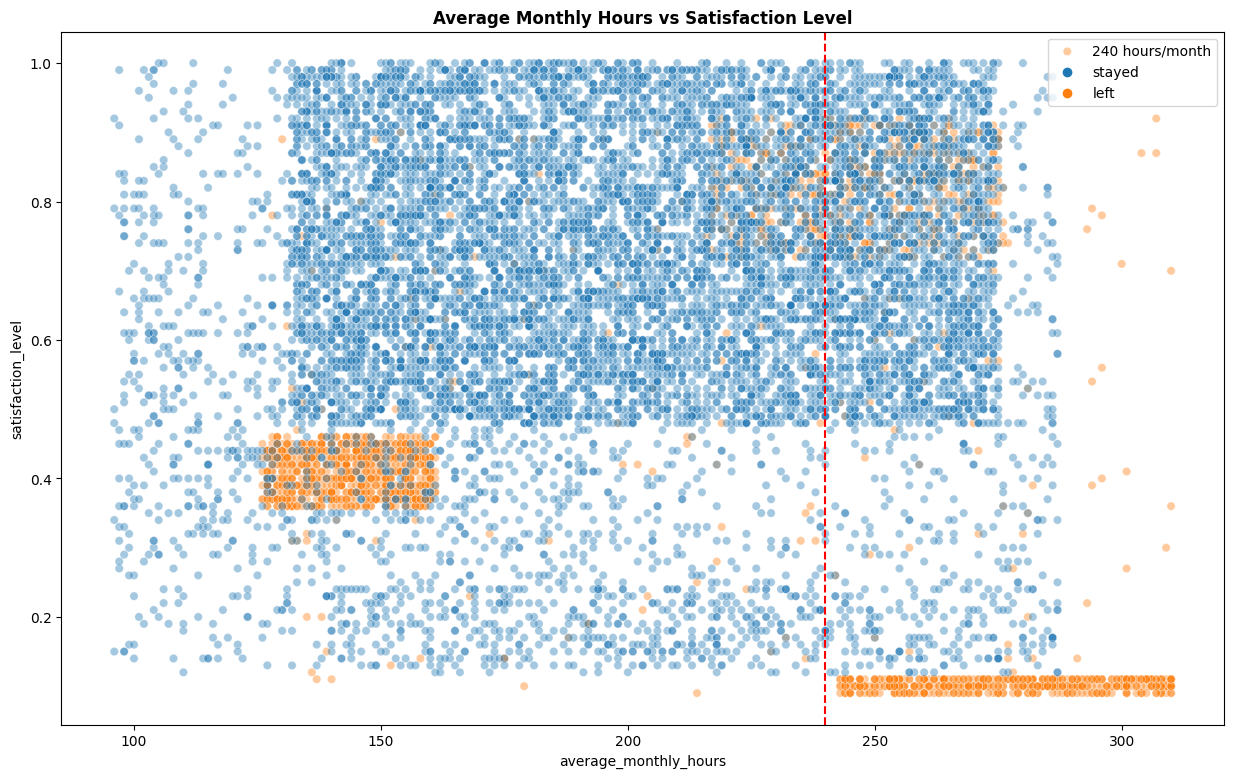

In [861]:
plt.figure(figsize=(15,9))
sns.scatterplot(data=df1, x='average_monthly_hours', y='satisfaction_level', hue='left', alpha=0.4)
plt.axvline(x=240, color='red', label='240 hours/month', linestyle='--')
plt.legend(labels=['240 hours/month','stayed','left'], loc='upper right', markerscale=1)
plt.title('Average Monthly Hours vs Satisfaction Level', fontweight='bold')

plt.show()

From the scatterplot, it shows clearly that employees who worked for more than 240 hours/month returned satisfaction level that is close to 0. There are also a sizable group of employees who returned a satisfaction level of around 0.4 but still left the company.